In [1]:
import numpy as np

from scipy.stats import poisson

import matplotlib.pyplot as plt

from dynesty import NestedSampler


# See Example 5.3 in the notes

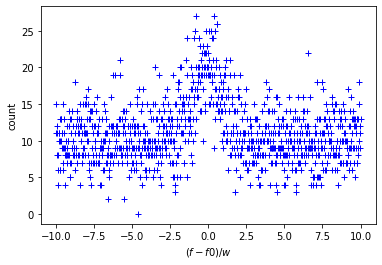

In [2]:
# load data
d=np.loadtxt("GaussianPulseSpectralData.dat")

freqs, data = d[:,0], d[:,1]

plt.plot(freqs, data, 'b+')
plt.xlabel(r'$(f-f0)/w$')
plt.ylabel(r'count')

plt.show()

# The two models

The "null hypothesis" is that there is no source present, only a background.

The "signal hypothesis" is that there is a Gaussian pulse in the data.

In [3]:
def model_A(f, B):
    return B

def model_B(f, A, B, f0=0, w=1):
    return A*np.exp(-0.5*((f-f0)/w)**2) + B

# Model A

In [4]:
def log_likelihood_A(B, f=freqs, d=data):
    m = model_A(f, B)
    return np.sum(poisson(m).logpmf(d))


In [5]:
ndim = 1

def prior_transform_A(u):
    """Transforms the uniform random variable `u ~ Unif[0., 1.)`
    to the parameters of interest:
    B = Unif[8,12)"""

    x = 4. * u + 8.  # scale and shift 
    
    return x

def log_likelihood_wrapperA(x):
    return log_likelihood_A(x[0])

samplerA = NestedSampler(log_likelihood_wrapperA, prior_transform_A, ndim, 
                        nlive=1024, bound='multi', sample='slice')

samplerA.run_nested(dlogz=0.1)



5189it [00:56, 91.18it/s, +1024 | bound: 9 | nc: 1 | ncall: 74091 | eff(%):  8.386 | loglstar:   -inf < -2870.070 <    inf | logz: -2872.782 +/-  0.061 | dlogz:  0.000 >  0.100]


In [6]:
logZ_A = samplerA.results.logz[-1]
print("log-evidence log(Z_A) =", logZ_A)

log-evidence log(Z_A) = -2872.7822676704895


# Model B

In [7]:
def log_likelihood_B(A, B, f0=0, w=1, f=freqs, d=data):
    m = model_B(f, A, B, f0=f0, w=w)
    return np.sum(poisson(m).logpmf(d))


In [8]:
ndim = 2

def prior_transform_B(u):
    """Transforms the uniform random variable `u ~ Unif[0., 1.)`
    to the parameters of interest:
    A = Unif[8,12)]
    B = Unif[8,12)"""

    x = 4. * u + 8.  # scale and shift 
    
    return x

def log_likelihood_wrapperB(x):
    return log_likelihood_B(x[0], x[1])

samplerB = NestedSampler(log_likelihood_wrapperB, prior_transform_B, ndim, 
                        nlive=1024, bound='multi', sample='slice')

samplerB.run_nested(dlogz=0.1)



6530it [02:16, 47.91it/s, +1024 | bound: 15 | nc: 1 | ncall: 174204 | eff(%):  4.336 | loglstar:   -inf < -2614.517 <    inf | logz: -2618.543 +/-  0.077 | dlogz:  0.000 >  0.100]


In [11]:
logZ_B = samplerB.results.logz[-1]
print("log-evidence log(Z_B) =", logZ_B)

log-evidence log(Z_B) = -2618.5427296222174


# Posterior Odds Ratio
Let us assume equal prior odds; i.e. P(A)=P(B)=1/2.

In [13]:
# Odds ratio O_{A,B}
logO_AB = logZ_A-logZ_B
print("log(O_{A,B}) =", logO_AB)

log(O_{A,B}) = -254.23953804827215


As this is strongly negative, there is clear evidence in favour of model B (which is obviously true just from looking at the data).